# HW4

## Imports 

In [469]:
#import statements:

import autograd.numpy as np
from autograd import grad
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

# Skip the first row (header row)
data = pd.read_csv("hw4_cluster.csv", skiprows=1, header=None)

## K-means 

In [471]:
# Function to compute the mean of a cluster
def compute_mean(cluster, mean_Method):
    if mean_Method == 'mean':
        # Simple mean computation (average of points in the cluster)
        return np.mean(cluster, axis=0)
    else:
        raise ValueError("Unsupported mean_Method")
     
def k_means(input, mean_Method, init_Method, max_iter, K):
    # initialize an array of K clusters (each cluster is represented by an array, so this is an array of arrays)

    # split input into initial set of K clusters using initialization method 
    if init_Method == 'randomseedselection':
        # Random initialization of cluster centers
        indices = np.random.choice(len(input), K, replace=False)
        clusters = [input.iloc[i].values for i in indices]
    # Random split initialization of clusters
    elif init_Method == 'randomsplitinitialization':
        cluster_assignments = np.random.randint(0, K, len(input))
        clusters = [input.iloc[cluster_assignments == i].values for i in range(K)]
    else:
        raise ValueError("Unsupported init_Method")

    # Function to assign each point to the closest cluster
    def assign_to_clusters(input, clusters):
        
        assignments = []
        for i in range(len(input)):
            point = input.iloc[i].values  # Use .iloc to get the point as an array
            distances = [np.linalg.norm(point - cluster) for cluster in clusters]
            assignments.append(np.argmin(distances))
        return assignments

    #stop condition 1: max_iter reached
    for iteration in range(max_iter):
        # Step 1: Assign points to clusters
        assignments = assign_to_clusters(input, clusters)

        # Step 2: Recompute the means of each cluster
        new_clusters = []
        for i in range(K):
            cluster_points = [input.iloc[j] for j in range(len(input)) if assignments[j] == i]
            if cluster_points:
                new_clusters.append(compute_mean(cluster_points, mean_Method))
            else:
                new_clusters.append(np.zeros_like(clusters[0]))  # Handle empty cluster

        # Stop condition 2: clusters have not changed
        if np.array_equal(new_clusters, clusters):
            print(f"Converged at iteration {iteration}")
            break

        # Step 3: Update clusters
        clusters = new_clusters

        # Step 4: If any cluster is empty, remove it and reduce K
        for i in range(len(clusters)-1, -1, -1):
            if np.all(clusters[i] == 0):
                del clusters[i]
                K -= 1
        
        # Reinitialize clusters if K is less than the initial K (this helps for the random split initializaiton method)
        if K < len(new_clusters):
            print(f"Reinitializing clusters because K is now {K}.")
            cluster_assignments = np.random.randint(0, K, len(input))  # Re-randomly assign points to clusters
            clusters = [input.iloc[cluster_assignments == i].values for i in range(K)]
            
    return clusters, assignments
    # return array of clusters

## Silhouette

In [550]:
# Helper function to compute the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)
        
def silhouette(X,labels,clusters):
    #initialize total
    
    total_silhouette = 0
    for i in range(len(X)):
        point=X.iloc[i].values
        cluster=labels[i]
        cluster_centroid=clusters[cluster]
        min_dist = np.inf
        closest_cluster=None
        for k in range(len(clusters)):
            cc=clusters[k]
            cluster_dist = euclidean_distance(cc, cluster_centroid)
            if cluster_dist > 0 and cluster_dist < min_dist:
                min_dist = cluster_dist
                closest_cluster=k
        
        intra_distance=0
        num_intra_points=0
        inter_distance=0
        num_inter_points=0
        for j in range(len(X)):
            other_point=X.iloc[j].values
            other_cluster=labels[j]
            if i==j:
                continue

            if cluster==other_cluster:
                intra_distance += euclidean_distance(point, other_point)
                num_intra_points+=1
            elif other_cluster==closest_cluster:
                inter_distance += euclidean_distance(point, other_point)
                num_inter_points+=1
                
        
        a=intra_distance/num_intra_points
        b=inter_distance/(num_inter_points+1)
            
        silhouette_val = (b - a) / max(a, b)
        total_silhouette += silhouette_val

    return total_silhouette

## Results

In [553]:
# trial run with random seed selection and K = 5
K = 5
init_Method = 'randomseedselection'
max_iter = 50
mean_Method = 'mean'

clusters, assignments = k_means(data, mean_Method, init_Method, max_iter, K)
silhouette_score = silhouette(data, assignments, clusters)

print(f"Silhouete score for 5 clusters: {silhouette_score}")

Converged at iteration 3
Silhouete score for 5 clusters: 19.178776159568752


## Bonus

In [604]:

# run with different Ks
# sometimes you need to reinitialize the cluster (if K = K-1, reinitialize clusters and run for the remaining iterations)
# init_Method = 'randomseedselection'
# max_iter = 50
init_Method = 'randomsplitinitialization'
max_iter = 100
mean_Method = 'mean'

Ks=[1,2,3,4,5]
K_SScores={}
for i in range(10):
    for K in Ks:
        clusters, assignments = k_means(data, mean_Method, init_Method, max_iter, K)
        silhouette_score = silhouette(data, assignments, clusters)
        # print(f"Silhouete score for {K} clusters: {silhouette_score}")
        K_Score=K_SScores.get(K,[])
        K_Score.append(silhouette_score)
        K_SScores[K]=K_Score

Avg_Scores=[]
for K in Ks:
    print(f"Average Score for K={K}",np.mean(K_SScores[K]))
    Avg_Scores.append(np.mean(K_SScores[K]))

Converged at iteration 1
Converged at iteration 4
Converged at iteration 2
Converged at iteration 1
Converged at iteration 6
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 4
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 2
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 3
Converged at iteration 6
Converged at iteration 1
Converged at iteration 6
Converged at iteration 1
Converged at iteration 3
Converged at iteration 5
Converged at iteration 1
Converged at iteration 1
Converged at iteration 2
Converged at iteration 1
Converged at iteration 2
Converged at iteration 1
Converged at iteration 1
Converged at iteration 4
Converged at iteration 1
Converged at iteration 2
Converged at iteration 1
Converged at iteration 1
Converged at iteration 1
Converged at iteration 2
Converged at iteration 3


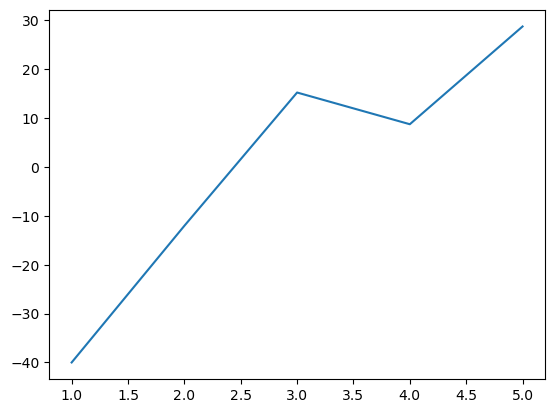

In [605]:
import matplotlib.pyplot as plt
plt.plot(Ks,Avg_Scores)
plt.show()

In [606]:
# Best value
print(f"The best K for random split initialization is {Avg_Scores.index(max(Avg_Scores))+1}")

The best K for random split initialization is 5
